In [ ]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import mylib as lib

data = lib.readcsv('data\ind30_m_vw_rets.csv')
#data.head()
data.columns = data.columns.str.strip()
data.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [8]:
history_return = lib.annualized_return(data["1996":"2000"])
cov = data["1996":"2000"].cov()

In [24]:
import numpy as np
weights = np.repeat(1/4, 4)
assets = ["Food", "Beer", "Smoke", "Coal"]
lib.portfolio_ret(weights, history_return[assets])

0.19511097196038413

In [25]:
lib.portfolio_vol(weights, cov.loc[assets, assets])

0.055059195776437045

## 2 Assets Frontier

In [58]:
num_points = 20
portfolio_assets = ["Games", "Fin"]
portfolio_weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, num_points)]

In [62]:
portfolio_weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [66]:
final_ret = [lib.portfolio_ret(w, history_return[portfolio_assets]) for w in portfolio_weights]
final_vol = [lib.portfolio_vol(w, cov.loc[portfolio_assets, portfolio_assets]) for w in portfolio_weights]
frontier = pd.DataFrame({"Returns": final_ret, "Volatility": final_vol})

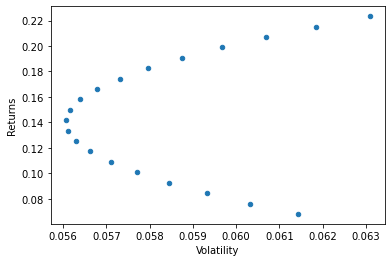

In [67]:
frontier.plot.scatter(y="Returns", x="Volatility")

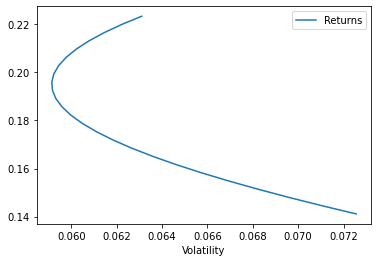

In [72]:
l = ["Fin", "Beer"]
lib.potfolio_frontier_2(25, history_return[l], cov.loc[l,l])